# Métodos Numéricos para Engenharia  
## Lista de Exercícios Avaliativa (G)

**Prazo de Entrega:** 03/12/2025  
**Professor:** Rodrigo Andrés Miranda Cerda  
**Data:** 26 de Novembro de 2025  

---

## Instruções Gerais

As questões que **dispensam o uso de código computacional** deverão ser feitas **à mão** e entregues em formato de imagem (por exemplo, PNG, JPG) ou PDF.  
A resolução deve ser **legível**, caso contrário poderá haver desconto na pontuação.

As atividades que **exigem implementação de código** e construção de gráficos deverão ser feitas utilizando **linguagem Python** e entregues em formato **Jupyter Notebook**.

A implementação do método numérico (por exemplo, **bissecção**, **eliminação de Gauss**) deverá ser feita em um **módulo ou função separada**, distinta dos valores numéricos e condições iniciais, seguindo os códigos de exemplo apresentados pelo professor em aula.

A resolução completa da lista deverá ser entregue em um arquivo compactado (**zip**, **tar.gz** etc.), contendo todos os arquivos necessários, através de tarefa no sistema **Microsoft Teams**.

---

## Grupo 5 – Integrantes

| Nome | Matrícula |
|------|-----------|
| Kauã Vinícius Ponte Aguiar | 211029399 |
| Arthur Davel Vieira Belarmino | 241038165 |
| Lucas Gobbi Bergholz | 211029441 |
| Tiago Scherrer Tavares de Lyra | 190048549 |
| Paulo Victor Fonseca Sousa | 211043718 |
| Edson Pereira Roldao | 232025730 |
| André Ricardo Meyer de Melo | 231011097 |
| Bruno Campos Ribeiro | 211039288 |
| Igor e Silva Penha | 211029352 |
| Thauany Vieira Brito | 241011878 |
| Ian da Costa Gama |  190125829 |
| Cauã Clemente Oliveira | 222006623 |

---


## 2. (3 pontos — Seção 24.3, Ref. [2])

O valor médio de uma corrente elétrica oscilante em um período pode ser zero. Ainda assim, esse tipo de corrente é capaz de realizar trabalho e produzir calor. Para caracterizar esse comportamento, utiliza-se a **corrente eficaz (RMS)**, definida por:

$$
I_{RMS} = \sqrt{\frac{1}{T} \int_0^{T} (i(t))^2 \, dt}
$$

onde \( i(t) \) representa o valor instantâneo da corrente. Considere a corrente:

$$
i(t) = 5 e^{-1.25 t} \sin(2\pi t), \qquad T = 1\text{ s}.
$$


(a) Construa o gráfico da onda descrita pela equação acima no intervalo:

$$
t \in \left[0,\; \frac{T}{2}\right]
$$

O gráfico deve representar claramente a forma da corrente amortecida durante meio período.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
T = 1.0

def i_t(t):
    return 5 * np.exp(-1.25 * t) * np.sin(2 * np.pi * t)

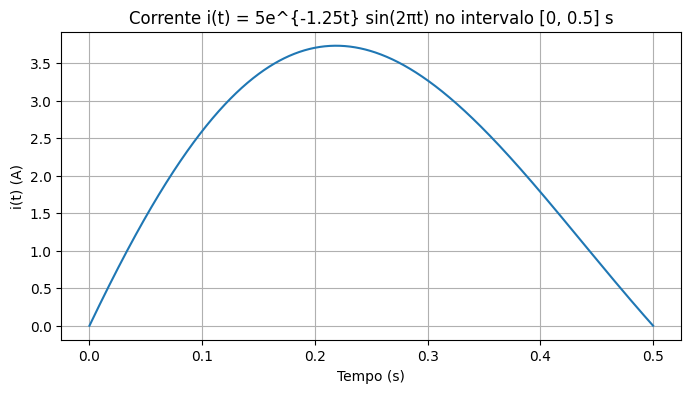

In [ ]:
t = np.linspace(0, T/2, 1000)

i = i_t(t)

plt.figure(figsize=(8, 4))
plt.plot(t, i)
plt.title("Corrente i(t) = 5e^{-1.25t} sin(2πt) no intervalo [0, 0.5] s")
plt.xlabel("Tempo (s)")
plt.ylabel("i(t) (A)")
plt.grid(True)
plt.show()


### (b) Cálculo da Corrente Eficaz com a Regra 1/3 de Simpson

Implemente a **Regra 1/3 de Simpson** utilizando código em **Python**, para calcular  
a **corrente eficaz (RMS)** durante **meio período** da corrente definida na Eq. (1).

Utilize **32 segmentos** na integração numérica.


In [ ]:
def simpson_1_3(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    S = y[0] + y[-1]
    S += 4 * np.sum(y[1:-1:2])
    S += 2 * np.sum(y[2:-2:2])
    return (h / 3) * S

a = 0
b = T / 2
n = 32

integral = simpson_1_3(lambda t: i_t(t)**2, a, b, n)
I_rms_half = np.sqrt((2/T) * integral)

print("Integral =", integral)
print("Corrente RMS no meio período =", I_rms_half)


Integral = 3.431659444517731
Corrente RMS no meio período = 2.6197936729894327


# Questão 4 - Diagrama de Bifurcação do Mapa Logístico

**Função:** $G(x) = rx(1-x)$

Nesta questão, vamos construir o diagrama de bifurcação do mapa logístico para dois intervalos diferentes:
- (a) $r \in [2.5, 4.0]$ - Visão geral
- (b) $r \in [3.62, 3.64]$ - Zoom em região com bifurcações

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Definição da Função do Mapa Logístico

In [ ]:
def mapa_logistico(x, r):
    """Função do mapa logístico G(x) = rx(1-x)"""
    x = r * x * (1 - x)
    return x

## Função para Gerar o Diagrama de Bifurcação

In [ ]:
def diagrama_bifurcacao(rinit, rend, num_pontos_r=500, num_transiente=500, num_plotados=100):
    """
    Gera o diagrama de bifurcação do mapa logístico.
    
    Parâmetros:
    -----------
    rinit : float
        Valor inicial de r
    rend : float
        Valor final de r
    num_pontos_r : int
        Número de valores de r a serem testados
    num_transiente : int
        Número de iterações para descartar (transiente)
    num_plotados : int
        Número de pontos a serem plotados após o transiente
    
    Retorna:
    --------
    buffer_r, buffer_diagrama : arrays
        Arrays com os valores de r e x para plotagem
    """
    buffer_r = np.zeros(num_pontos_r * num_plotados)
    buffer_diagrama = np.zeros(num_pontos_r * num_plotados)
    k = 0
    
    for i in range(num_pontos_r):
        r = rinit + i * (rend - rinit) / num_pontos_r
        x = 0.1  # Condição inicial
        
        # Descarta valores transientes
        for j in range(num_transiente):
            x = mapa_logistico(x, r)
        
        # Armazena os valores após o transiente
        for j in range(num_plotados):
            x = mapa_logistico(x, r)
            buffer_r[k] = r
            buffer_diagrama[k] = x
            k = k + 1
    
    return buffer_r, buffer_diagrama

## (a) Diagrama de Bifurcação para $r \in [2.5, 4.0]$

In [ ]:
# Gera o diagrama para r ∈ [2.5, 4.0]
rinit_a = 2.5
rend_a = 4.0

buffer_r_a, buffer_diagrama_a = diagrama_bifurcacao(rinit_a, rend_a)

# Plotagem
plt.figure(figsize=(12, 8))
plt.scatter(buffer_r_a, buffer_diagrama_a, s=0.01, color='black')
plt.xlabel('r', fontsize=14)
plt.ylabel('x', fontsize=14)
plt.title('Diagrama de Bifurcação do Mapa Logístico: $r \in [2.5, 4.0]$', fontsize=16)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## (b) Diagrama de Bifurcação para $r \in [3.62, 3.64]$ (Zoom)

In [ ]:
# Gera o diagrama para r ∈ [3.62, 3.64] - Zoom em região específica
rinit_b = 3.62
rend_b = 3.64

buffer_r_b, buffer_diagrama_b = diagrama_bifurcacao(rinit_b, rend_b)

# Plotagem
plt.figure(figsize=(12, 8))
plt.scatter(buffer_r_b, buffer_diagrama_b, s=0.05, color='darkblue')
plt.xlabel('r', fontsize=14)
plt.ylabel('x', fontsize=14)
plt.title('Diagrama de Bifurcação do Mapa Logístico: $r \in [3.62, 3.64]$ (Zoom)', fontsize=16)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Análise dos Resultados

### Diagrama completo ($r \in [2.5, 4.0]$):
Este diagrama mostra a evolução completa do comportamento do mapa logístico:
- Para $r < 3$: Um único ponto fixo estável
- Para $r \approx 3$: Primeira bifurcação (período 2)
- Para $3 < r < 3.57$: Cascata de bifurcações (períodos 4, 8, 16, ...)
- Para $r > 3.57$: Região caótica com janelas de periodicidade

### Diagrama zoom ($r \in [3.62, 3.64]$):
Esta região mostra detalhes da estrutura fractal do diagrama de bifurcação, revelando:
- Autossimilaridade: padrões que se repetem em escalas menores
- Janelas de periodicidade em meio ao caos
- Estrutura complexa típica de sistemas dinâmicos caóticos